# Exploratory Data Analysis

In [3]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer

## 1. Understand the Structure of the Data
* Inspect data types of each column
* Check dimensions of the dataset
* View initial records

In [8]:
df = pd.read_json("scicite/train.jsonl", lines=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8243 entries, 0 to 8242
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   source             8241 non-null   object 
 1   citeEnd            8241 non-null   float64
 2   sectionName        8224 non-null   object 
 3   citeStart          8241 non-null   float64
 4   string             8243 non-null   object 
 5   label              8243 non-null   object 
 6   label_confidence   6137 non-null   float64
 7   citingPaperId      8243 non-null   object 
 8   citedPaperId       8243 non-null   object 
 9   isKeyCitation      8243 non-null   bool   
 10  id                 8243 non-null   object 
 11  unique_id          8243 non-null   object 
 12  excerpt_index      8243 non-null   int64  
 13  label2             835 non-null    object 
 14  label2_confidence  317 non-null    float64
dtypes: bool(1), float64(4), int64(1), object(9)
memory usage: 909.8+ KB


In [11]:
df.shape

(8243, 15)

In [12]:
df.head()

,source,citeEnd,sectionName,citeStart,string,label,label_confidence,citingPaperId,citedPaperId,isKeyCitation,id,unique_id,excerpt_index,label2,label2_confidence
0,explicit,175.0,Introduction,168.0,"However, how frataxin interacts with the Fe-S ...",background,1.0,1872080baa7d30ec8fb87be9a65358cd3a7fb649,894be9b4ea46a5c422e81ef3c241072d4c73fdc0,True,1872080baa7d30ec8fb87be9a65358cd3a7fb649>894be...,1872080baa7d30ec8fb87be9a65358cd3a7fb649>894be...,11,NaN,NaN
1,explicit,36.0,Novel Quantitative Trait Loci for Seminal Root...,16.0,"In the study by Hickey et al. (2012), spikes w...",background,1.0,ce1d09a4a3a8d7fd3405b9328f65f00c952cf64b,b6642e19efb8db5623b3cc4eef1c5822a6151107,True,ce1d09a4a3a8d7fd3405b9328f65f00c952cf64b>b6642...,ce1d09a4a3a8d7fd3405b9328f65f00c952cf64b>b6642...,2,NaN,NaN
2,explicit,228.0,Introduction,225.0,"The drug also reduces catecholamine secretion,...",background,1.0,9cdf605beb1aa1078f235c4332b3024daa8b31dc,4e6a17fb8d7a3cada601d942e22eb5da6d01adbd,False,9cdf605beb1aa1078f235c4332b3024daa8b31dc>4e6a1...,9cdf605beb1aa1078f235c4332b3024daa8b31dc>4e6a1...,0,NaN,NaN
3,explicit,110.0,Discussion,46.0,By clustering with lowly aggressive close kin ...,background,1.0,d9f3207db0c79a3b154f3875c9760cc6b056904b,2cc6ff899bf17666ad35893524a4d61624555ed7,False,d9f3207db0c79a3b154f3875c9760cc6b056904b>2cc6f...,d9f3207db0c79a3b154f3875c9760cc6b056904b>2cc6f...,3,NaN,NaN
4,explicit,239.0,Discussion,234.0,Ophthalmic symptoms are rare manifestations of...,background,1.0,88b86556857f4374842d2af2e359576806239175,a5bb0ff1a026944d2a47a155462959af2b8505a8,False,88b86556857f4374842d2af2e359576806239175>a5bb0...,88b86556857f4374842d2af2e359576806239175>a5bb0...,2,NaN,NaN


## 2. Data Cleaning Check
* Check for null/missing values
* Analyze Class Distribution
* Explore Text Lengths
* Visualize Word Frequency
* Check for Common Words
* Bigrams & Trigrams Analysis

In [13]:
df.isnull().sum()

source                  2
citeEnd                 2
sectionName            19
citeStart               2
string                  0
label                   0
label_confidence     2106
citingPaperId           0
citedPaperId            0
isKeyCitation           0
id                      0
unique_id               0
excerpt_index           0
label2               7408
label2_confidence    7926
dtype: int64

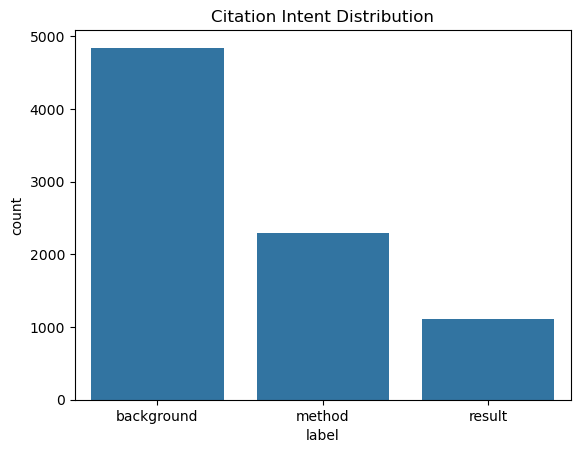

In [21]:
sns.countplot(x=df['label'])
plt.title("Citation Intent Distribution")
plt.show()

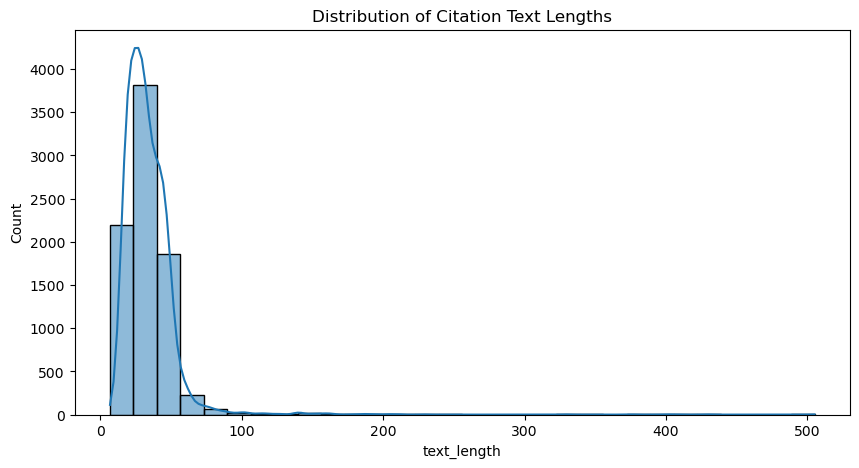

In [22]:
df['text_length'] = df['string'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 5))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title("Distribution of Citation Text Lengths")
plt.show()

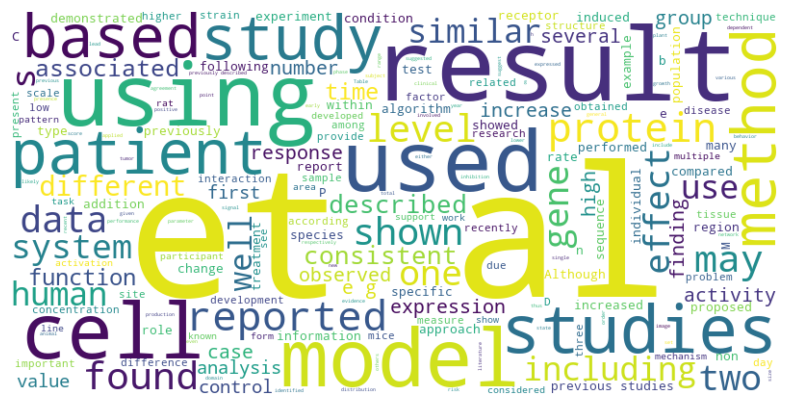

In [26]:
text = " ".join(df['string'].tolist())

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [29]:
nltk.download("stopwords")

stop_words = set(stopwords.words("english"))

# Tokenize and remove stopwords
words = [word.lower() for text in df['string'] for word in text.split() if word.lower() not in stop_words]

# Get most common words
word_counts = Counter(words).most_common(20)
word_counts

[nltk_data] Downloading package stopwords to /home/brina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('et', 7559),
 ('al.,', 4091),
 ('al.', 3235),
 ('results', 763),
 ('studies', 706),
 ('using', 695),
 ('also', 592),
 ('used', 564),
 ('&', 521),
 ('previous', 491),
 ('reported', 471),
 ('study', 447),
 ('previously', 432),
 ('described', 409),
 ('cells', 374),
 ('may', 346),
 ('data', 339),
 ('patients', 336),
 ('found', 336),
 ('shown', 324)]

In [31]:
bigrams = list(ngrams(words, 2))
trigrams = list(ngrams(words, 3))

# Get most common bigrams and trigrams
bigram_counts = Counter(bigrams).most_common(10)
trigram_counts = Counter(trigrams).most_common(10)

bigram_counts, trigram_counts

([(('et', 'al.,'), 4082),
  (('et', 'al.'), 3227),
  (('previous', 'studies'), 148),
  (('al.,', '2009;'), 122),
  (('al.,', '2008;'), 115),
  (('al.,', '2010;'), 110),
  (('al.,', '2006;'), 109),
  (('al.,', '2007;'), 106),
  (('al.,', '2011;'), 101),
  (('al.,', '2004;'), 99)],
 [(('et', 'al.,', '2009;'), 122),
  (('et', 'al.,', '2008;'), 115),
  (('et', 'al.,', '2010;'), 110),
  (('et', 'al.,', '2006;'), 109),
  (('et', 'al.,', '2007;'), 105),
  (('et', 'al.,', '2011;'), 101),
  (('et', 'al.,', '2004;'), 99),
  (('et', 'al.,', '2003;'), 97),
  (('et', 'al.,', '2002;'), 95),
  (('et', 'al.,', '2005;'), 93)])